<a href="https://colab.research.google.com/github/kesavanV03/Agriculture-raw-material-analysis/blob/main/Agriculture_raw_material_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/kesavanV03/Agriculture-raw-material-analysis.git


fatal: destination path 'Agriculture-raw-material-analysis' already exists and is not an empty directory.


In [7]:
pip install pandas numpy seaborn matplotlib scikit-learn openpyxl


In [8]:
!pip install jovian opendatasets --upgrade --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 897.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [10]:
# Downloading Data from Kaggle
dataset_url = 'https://www.kaggle.com/kianwee/agricultural-raw-material-prices-19902020?select=agricultural_raw_material.csv'


In [11]:
# We need to enter our API generated credentials upon prompt.
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kesavanv03
Your Kaggle Key: ··········


100%|██████████| 22.8k/22.8k [00:00<00:00, 5.53MB/s]

In [12]:
# Importing csv file
data_dir = './agricultural-raw-material-prices-19902020'

In [13]:
import os
os.listdir(data_dir)

['agricultural_raw_material.csv']

In [14]:
project_name = "analysis-agriculture-raw-mateial-prices" # Give project a name and use lowercase letters and hyphens only

In [15]:
!pip install jovian --upgrade -q

In [16]:
import jovian

In [17]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [18]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [19]:
import pandas as pd

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
sns.set(rc={'figure.figsize':(11, 4)})

In [21]:
# reading the csv data
agri_price_df = pd.read_csv('./agricultural-raw-material-prices-19902020/agricultural_raw_material.csv')

In [22]:
# checking whether the data meets the minimum project requirements (3 columns,150 rows)
agri_price_df.shape

(361, 25)

In [23]:
# result table
agri_price_df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


In [24]:
# columns list
agri_price_df.columns

Index(['Month', 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')

In [29]:
# Let's check the concise summary of our dataframe
agri_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [30]:
# It is advisable to make a copy of your dataset, so that we can return to the original data in case we made some wrong computation in our data.
agri_price_df_copy = agri_price_df.copy()

In [31]:
# Replacing %, "," and "-"
agri_price_df = agri_price_df.replace('%', '', regex=True)
agri_price_df = agri_price_df.replace(',', '', regex=True)
agri_price_df = agri_price_df.replace('-', '', regex=True)
agri_price_df = agri_price_df.replace('', np.nan)
agri_price_df = agri_price_df.replace('MAY90', np.nan)

In [32]:
# Dropping rows with NaN values
agri_price_df = agri_price_df.dropna()

In [33]:
# Check to see if all NaN values are resolved
agri_price_df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [34]:
# Converting data type to float
agri = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]

In [35]:
agri_price_df[agri] = agri_price_df[agri].astype("float")

In [36]:
# check the data type now..It is changed.
agri_price_df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [37]:
import jovian

In [38]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [39]:
agri_price_df.describe()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,626.775429,3.845307,530.047761,5.562362,1.620736,3.999663,849.440092,4.803497,249.253620,3.257914,...,510.027178,2.268466,1.663282,5.499755,164.662025,5.442454,291.283497,4.979663,678.212362,2.800000
std,299.992828,3.628820,264.001641,5.091321,0.533457,3.930971,285.248110,4.698225,68.553994,3.423842,...,93.188458,2.659446,1.068344,5.185055,25.519555,4.768734,33.929470,5.773700,158.315029,2.890238
min,247.090000,0.000000,182.000000,0.000000,0.820000,0.000000,417.470000,0.000000,133.280000,0.010000,...,335.250000,0.000000,0.490000,0.000000,119.350000,0.000000,183.610000,0.000000,384.000000,0.000000
25%,368.490000,1.300000,371.000000,1.895000,1.272500,1.377500,646.257500,1.557500,195.275000,1.190000,...,434.727500,0.402500,0.842500,1.617500,146.117500,2.152500,277.717500,1.905000,544.632500,0.662500
50%,526.890000,2.910000,449.500000,4.350000,1.540000,2.840000,747.555000,3.470000,247.550000,2.335000,...,512.495000,1.470000,1.335000,3.910000,160.430000,4.230000,294.975000,3.695000,662.160000,2.000000
75%,848.795000,5.157500,657.125000,7.775000,1.830000,5.407500,1016.352500,6.362500,287.025000,4.285000,...,582.035000,3.147500,2.157500,7.397500,180.345000,7.457500,310.887500,6.122500,832.245000,4.107500
max,1391.470000,22.250000,1503.000000,31.820000,5.060000,23.640000,1865.440000,32.840000,520.810000,34.190000,...,751.810000,19.500000,6.260000,32.160000,259.970000,33.210000,372.600000,65.240000,966.490000,21.570000


In [40]:
agri_price_df.reset_index(inplace=True)

In [41]:
data_col = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price',
            'Hard log Price', 'Hard sawnwood Price', 'Plywood Price',
            'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price','Hide Price']

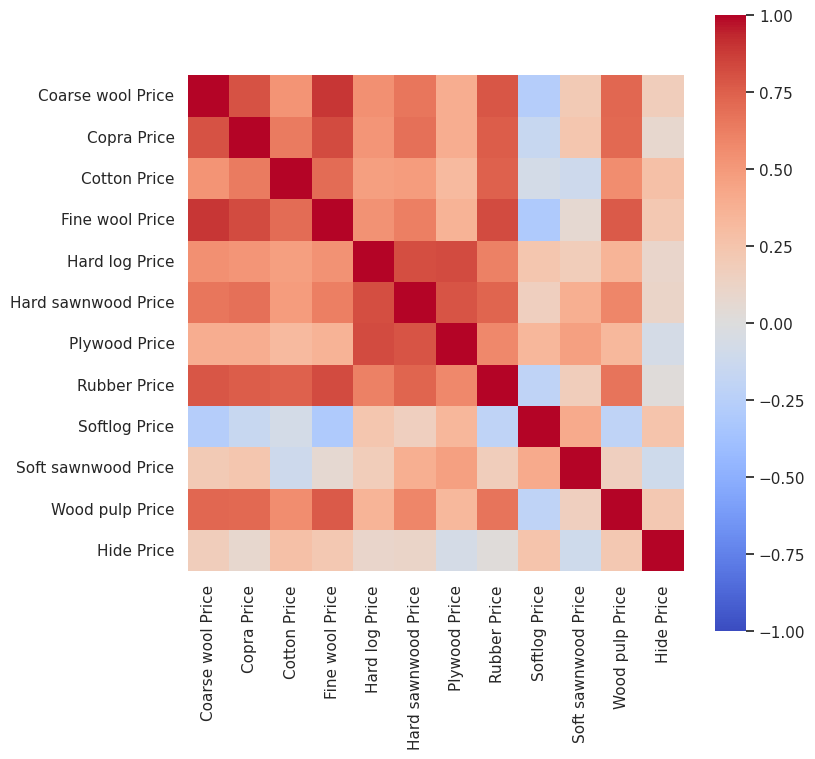

In [42]:
plt.figure(figsize=(8,8))
hm = sns.heatmap(agri_price_df[data_col].corr(), vmax=1, vmin=-1, cmap="coolwarm", square=True)

In [43]:
ratio_col = ['Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change', 'Fine wool price % Change',
             'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change',
             'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']

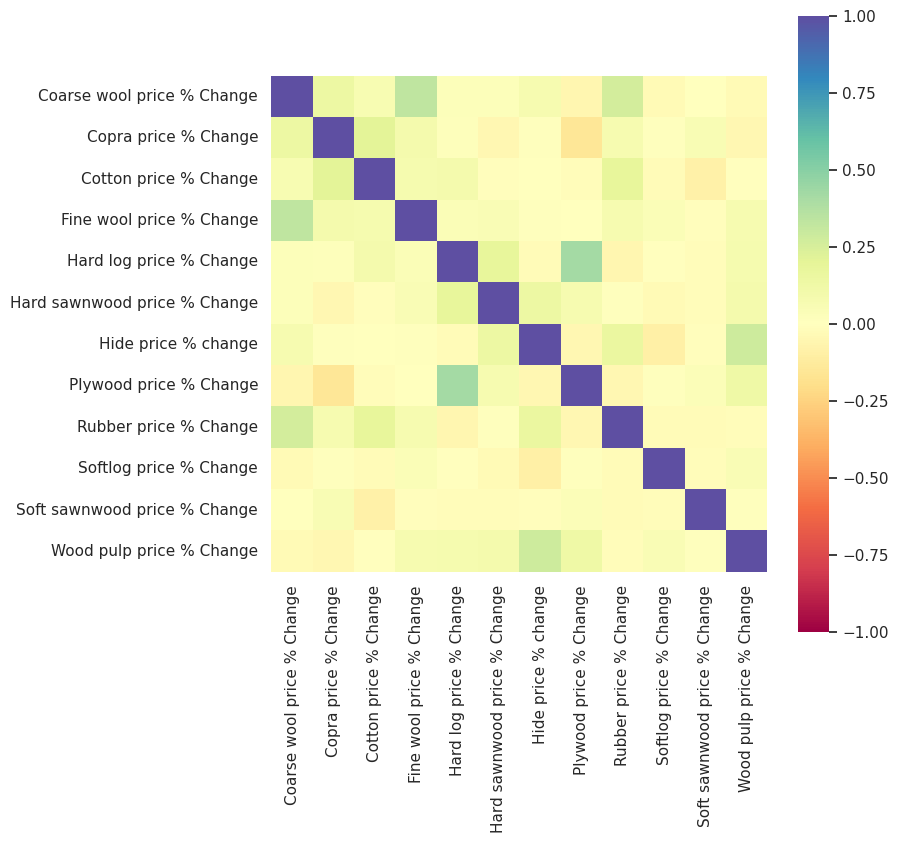

In [44]:
plt.figure(figsize=(8,8))
hm = sns.heatmap(agri_price_df[ratio_col].corr(), vmax=1, vmin=-1, cmap="Spectral", square=True)

In [45]:
price_df=agri_price_df.filter(['Coarse wool Price','Copra Price','Fine wool Price','Plywood Price','Hard log Price'])

In [46]:
# Make a copy
price_df_copy=price_df.copy()

In [47]:
percent_df=agri_price_df.filter(['Coarse wool price % Change','Copra price % Change','Fine wool price % Change','Plywood price % Change','Hard log price % Change'])

In [48]:
# Make a copy
percent_df_copy=percent_df.copy()

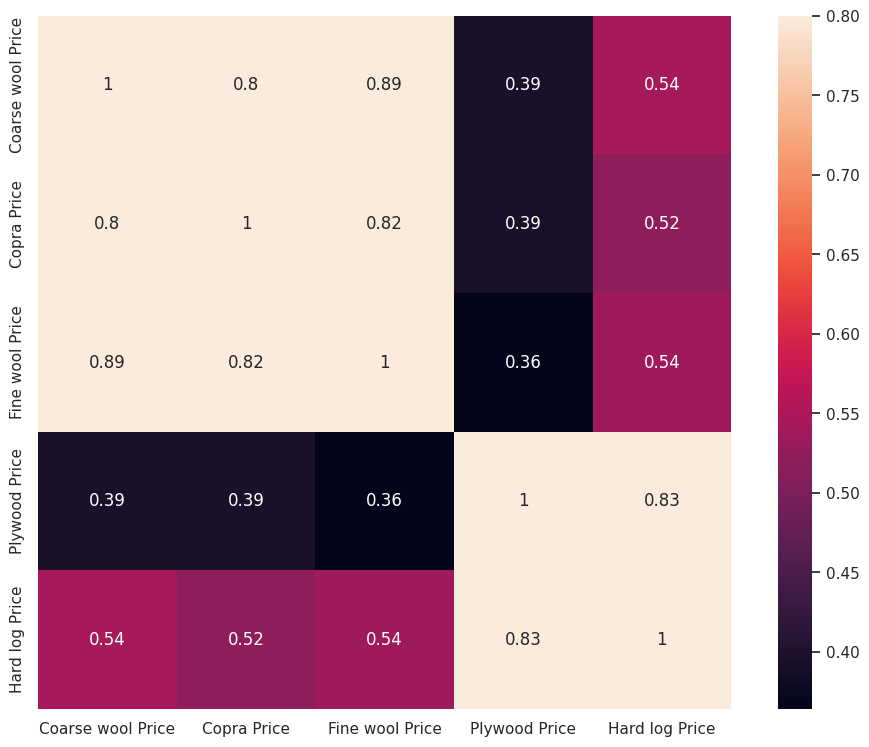

In [49]:
corrmat = price_df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

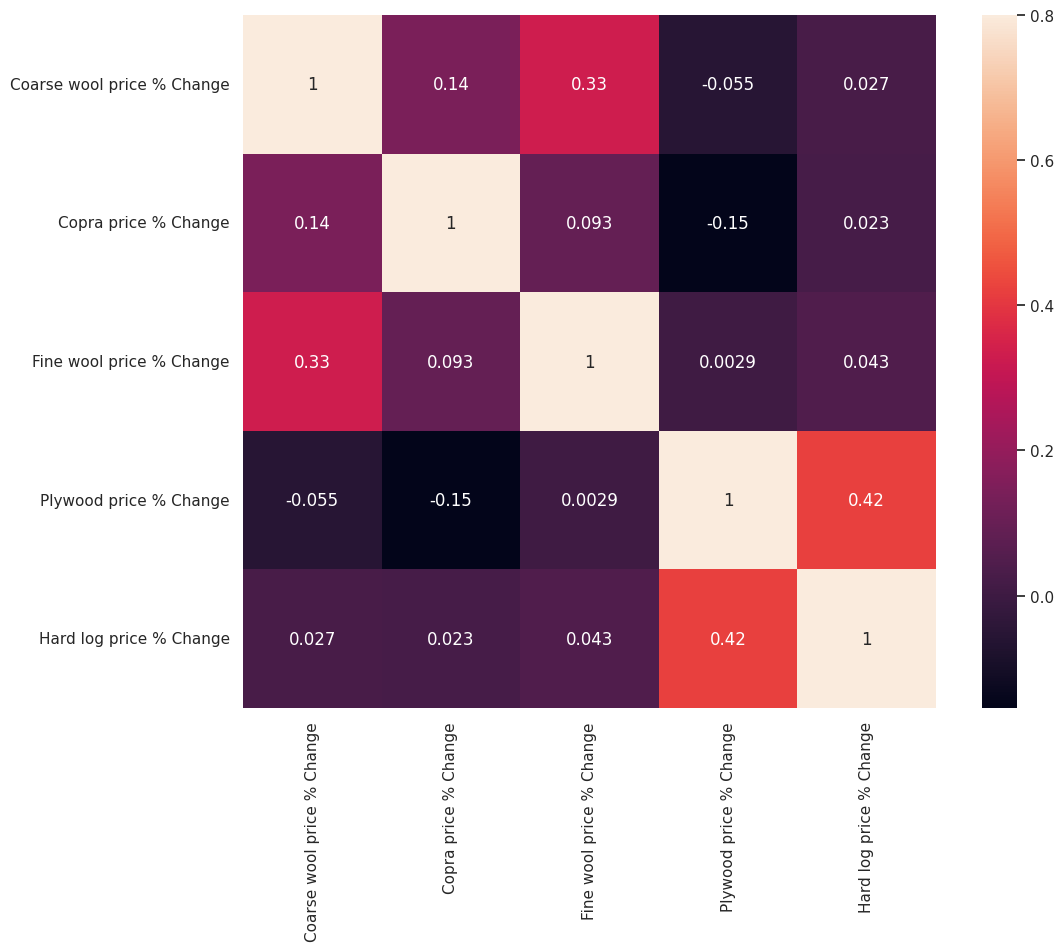

In [50]:
corrmat = percent_df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [51]:
# set the index column as Month
agri_price_df.set_index('Month', inplace=True)

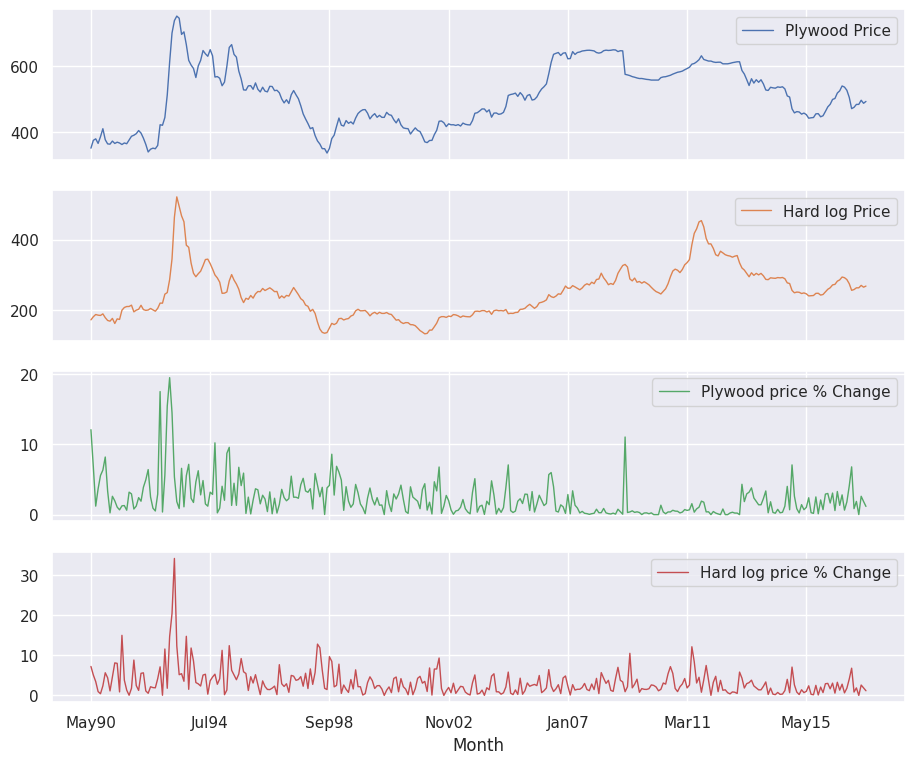

In [52]:
axes = agri_price_df[["Plywood Price","Hard log Price","Plywood price % Change","Hard log price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

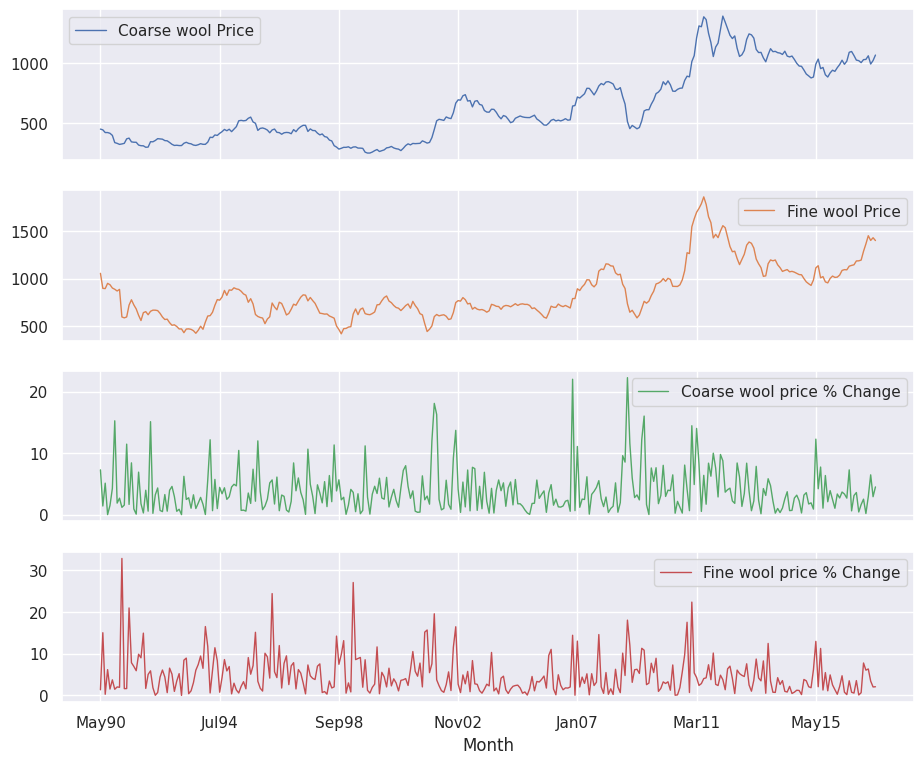

In [53]:
axes = agri_price_df[["Coarse wool Price","Fine wool Price","Coarse wool price % Change","Fine wool price % Change"]].plot(figsize=(11, 9),subplots=True,linewidth=1)

In [54]:
# Filtering the selected raw materials columns from the main data.

select_df=agri_price_df.filter(['Month','Plywood Price','Hard log Price','Plywood price % Change','Hard log price % Change'])

In [55]:
# Filtering data for the year 2009 and 2010

select_df_year= select_df.loc['Jan09':'Dec10']

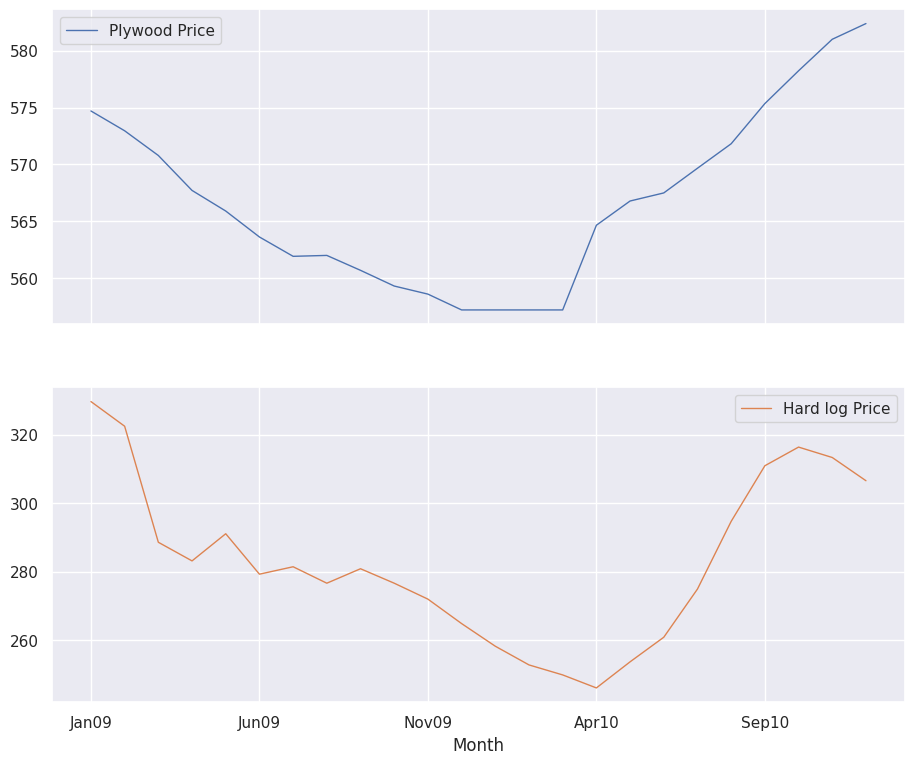

In [56]:
axes = select_df_year[["Plywood Price","Hard log Price",]].plot(figsize=(11, 9),subplots=True,linewidth=1)

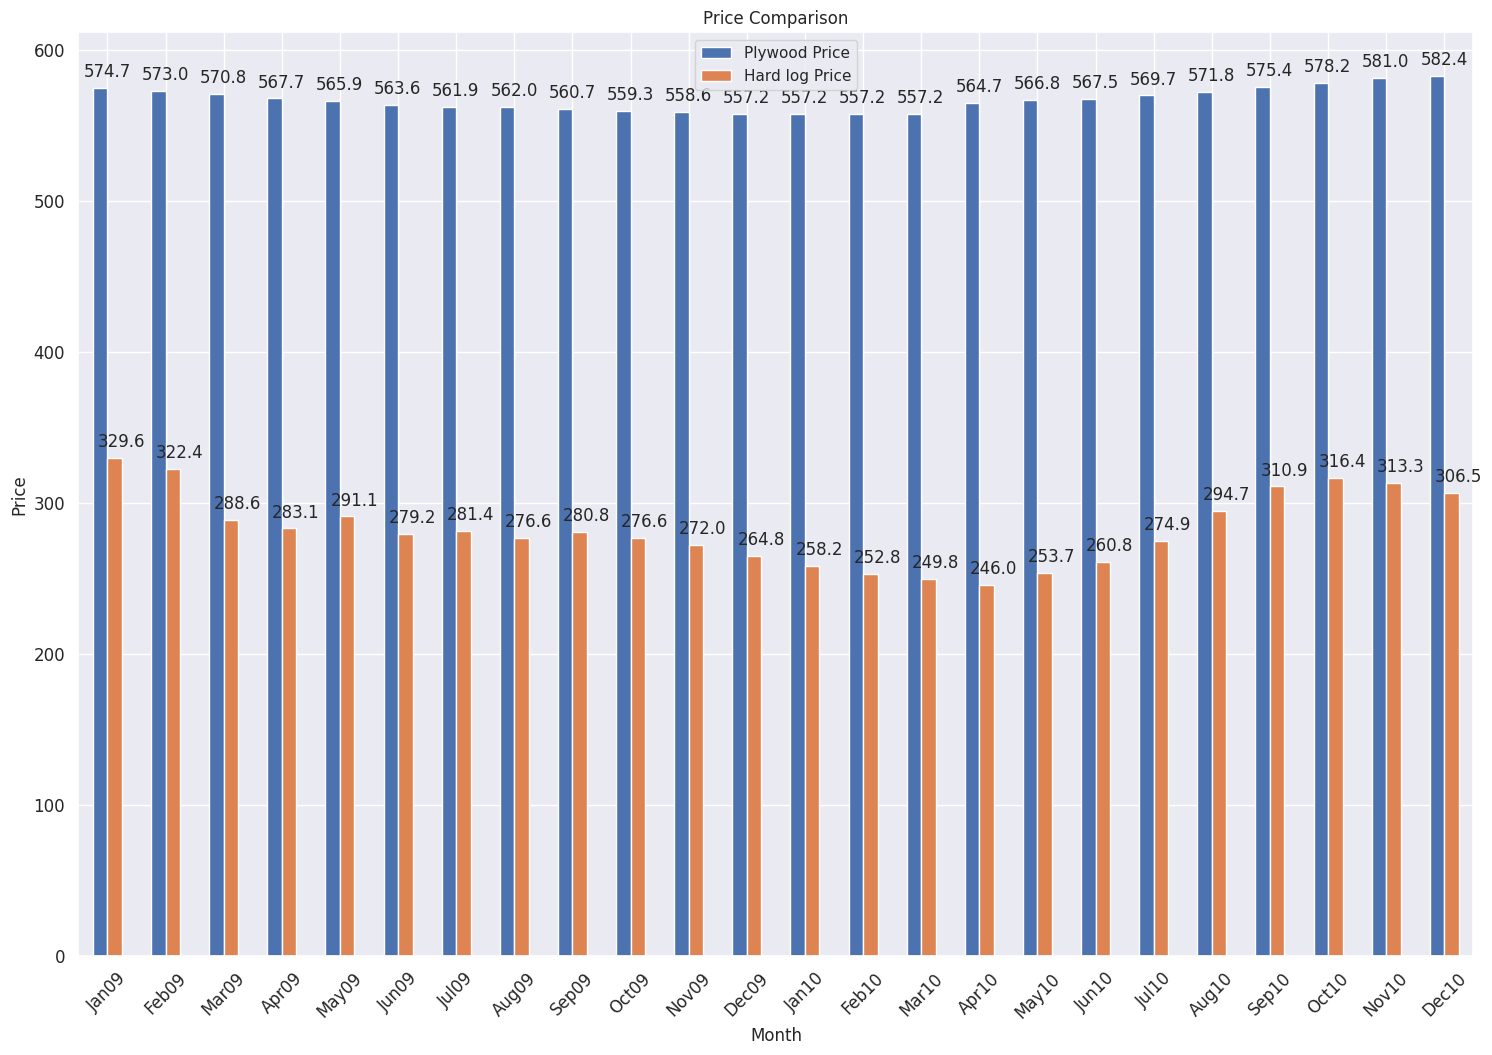

In [57]:
ax = select_df_year[['Plywood Price','Hard log Price']].plot(kind='bar', title ="Price Comparison", figsize=(18, 12), legend=True, fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
ax.set_xticklabels(select_df_year.index.format(),rotation=45)

def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(5, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above.
add_value_labels(ax)
plt.show()

# This code is in response to a user question on Stackoverflow. Please refer section Refrences for the link to the actual question and code.

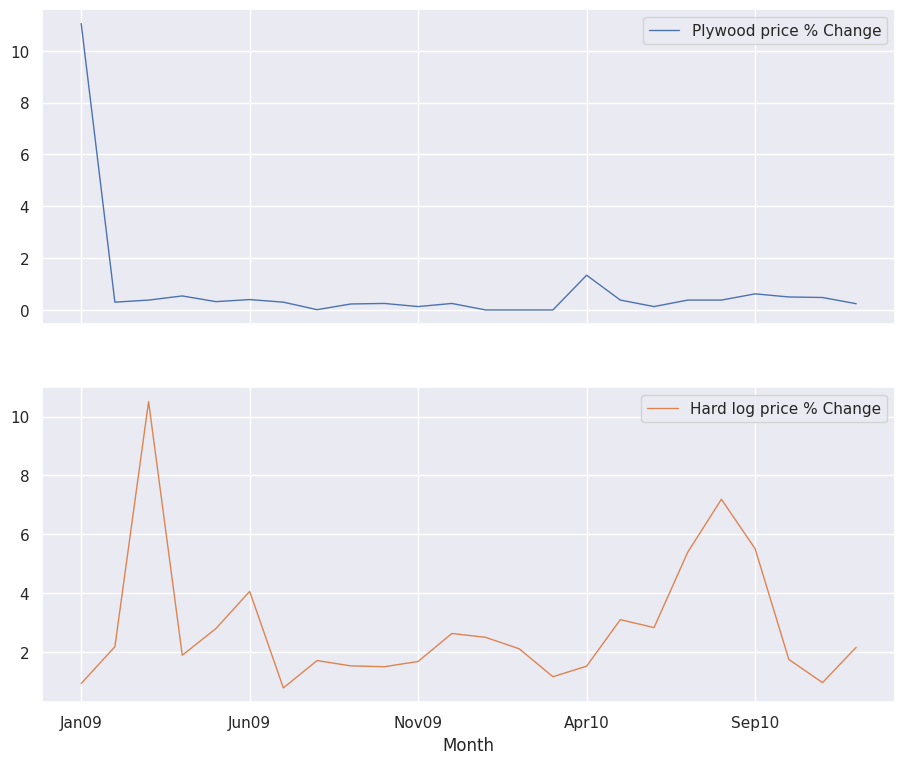

In [58]:
axes = select_df_year[["Plywood price % Change","Hard log price % Change",]].plot(figsize=(11, 9),subplots=True,linewidth=1)